In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Aave= pd.read_csv('coin_Aave.csv')
Aave['Date']=pd.to_datetime(Aave['Date'])
Aave

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...,...
270,271,Aave,AAVE,2021-07-02 23:59:59,234.483957,215.951539,230.814119,233.948437,2.566395e+08,3.001542e+09
271,272,Aave,AAVE,2021-07-03 23:59:59,265.107342,228.485206,234.208478,259.655225,3.853778e+08,3.331546e+09
272,273,Aave,AAVE,2021-07-04 23:59:59,289.001124,248.285491,259.399426,277.038792,4.275719e+08,3.555054e+09
273,274,Aave,AAVE,2021-07-05 23:59:59,317.387234,263.433881,277.110533,307.829079,7.931409e+08,3.950269e+09


In [3]:
Aave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        275 non-null    int64         
 1   Name       275 non-null    object        
 2   Symbol     275 non-null    object        
 3   Date       275 non-null    datetime64[ns]
 4   High       275 non-null    float64       
 5   Low        275 non-null    float64       
 6   Open       275 non-null    float64       
 7   Close      275 non-null    float64       
 8   Volume     275 non-null    float64       
 9   Marketcap  275 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 21.6+ KB


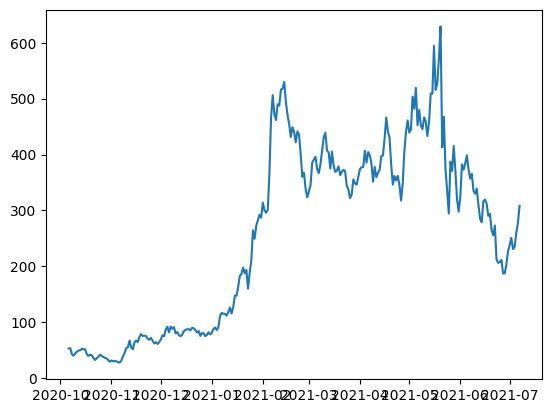

In [4]:
open_vis=plt.plot(Aave['Date'],Aave['Open'])
open_vis

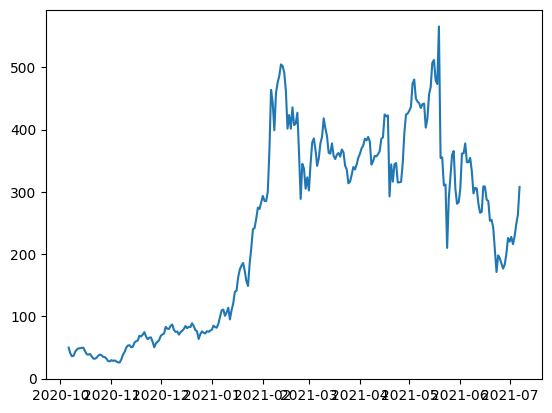

In [5]:
plt.plot(Aave['Date'],Aave['Low'])


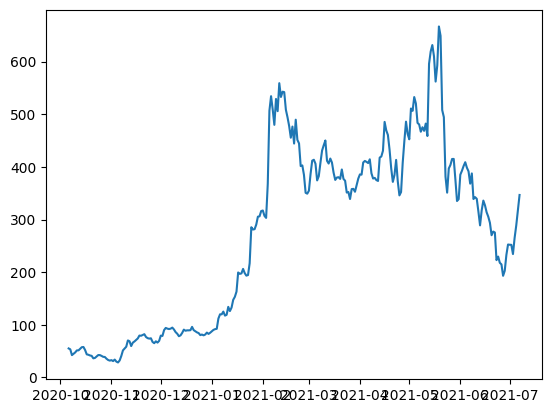

In [6]:
plt.plot(Aave['Date'],Aave['High'])


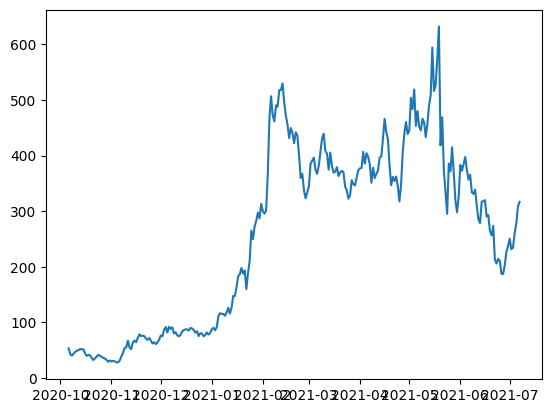

In [7]:
plt.plot(Aave['Date'],Aave['Close'])


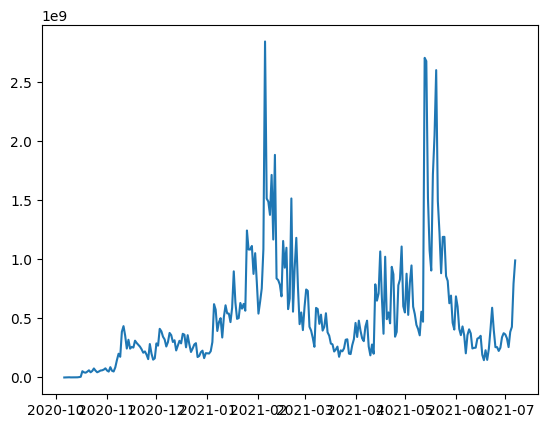

In [8]:
plt.plot(Aave['Date'],Aave['Volume'])

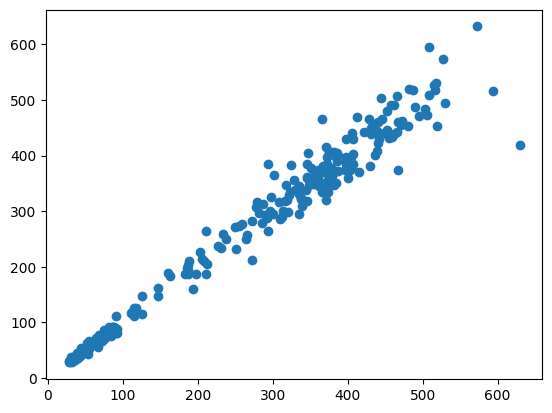

In [14]:
plt.scatter(Aave['Open'],Aave['Close'])

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
open_data=Aave[['Date','Open','Close']]
X = open_data[['Open']]
y = open_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
model=LinearRegression()
model.fit(X_train,y_train)
lin_pred= model.predict(X_test)

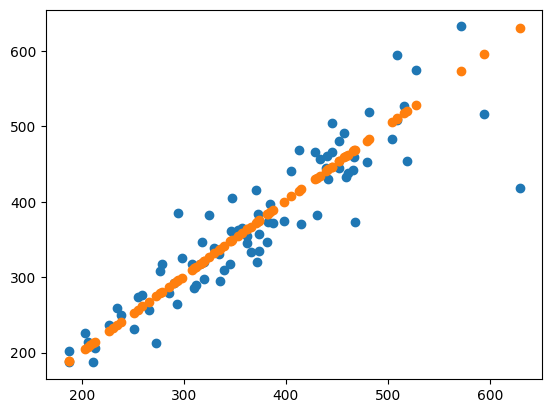

In [20]:
plt.scatter(X_test,y_test)
plt.scatter(X_test,lin_pred)

In [25]:
multi_data=Aave[['High','Open','Close']]
X = multi_data[['Open','High']]
y = multi_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
model=LinearRegression()
model.fit(X_train,y_train)
multi_pred= model.predict(X_test)

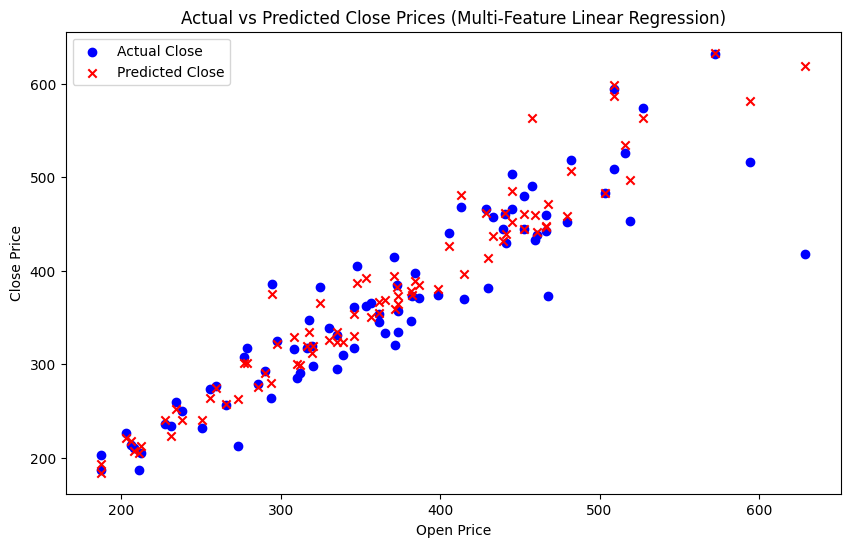

In [27]:
plt.figure(figsize=(10, 6))

# Actual values
plt.scatter(X_test['Open'], y_test, color='blue', label='Actual Close')

# Predicted values
plt.scatter(X_test['Open'], multi_pred, color='red', marker='x', label='Predicted Close')

plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices (Multi-Feature Linear Regression)')
plt.legend()
plt.show()

In [31]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [34]:
train_errs = []
test_errs = []

for d in range(1, 26):
    pl = make_pipeline(PolynomialFeatures(d), LinearRegression())
    pl.fit(X_train, y_train)
    train_errs.append(mean_squared_error(y_train, pl.predict(X_train)))
    test_errs.append(mean_squared_error(y_test, pl.predict(X_test)))

errs = pd.DataFrame({'Train Error': train_errs, 'Test Error': test_errs})

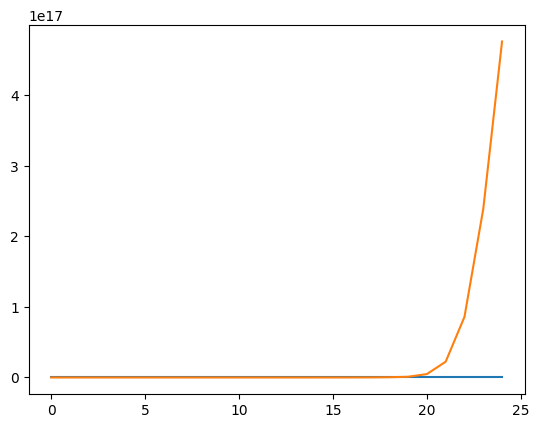

In [36]:
plt.plot(errs)

In [37]:
import plotly.express as px

In [38]:
px.line(errs)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=Train Error<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Train Error',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Train Error',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': 'AAECAwQFBgcICQoLDA0ODxAREhMUFRYXGA==', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('a2TEfgqfVEDZ32bkM61SQBbTRJY2k1' ... '6SJ+OzQFFysq9GsrVASOl9WGKmt0A='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Test Error<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Test Error',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Test Error',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': 'AAECAwQFBgcICQoLDA0ODxAREhMUFRYXGA==', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('eP5+Z7l+kEAuOYqpv2+MQKJrctFNtI' ... 'hEDxJzQ1L2S8t2gIpDZhZQ7hdrmkM='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})